In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
data=pd.read_csv("C:/Users/Amani/Desktop/python/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
data.shape

(21613, 21)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [62]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [63]:
data[data==0].count()

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [66]:
#remplacer les 0 par la median pour les colonnes :bedrooms et bedrooms
#on va supprimer waterfront,view ,sqft_basement parce que le plus part des données sont à zero
#drop la colonnes Id et la colonne date (aucun rapport avec le prix )
data=data.drop(["date","id","view","sqft_basement","waterfront"],axis=1)
data['bathrooms'].replace(to_replace = 0, value = data.bathrooms.median(), inplace= True)
data['bedrooms'].replace(to_replace = 0, value = data.bedrooms.median(), inplace= True)

<AxesSubplot:>

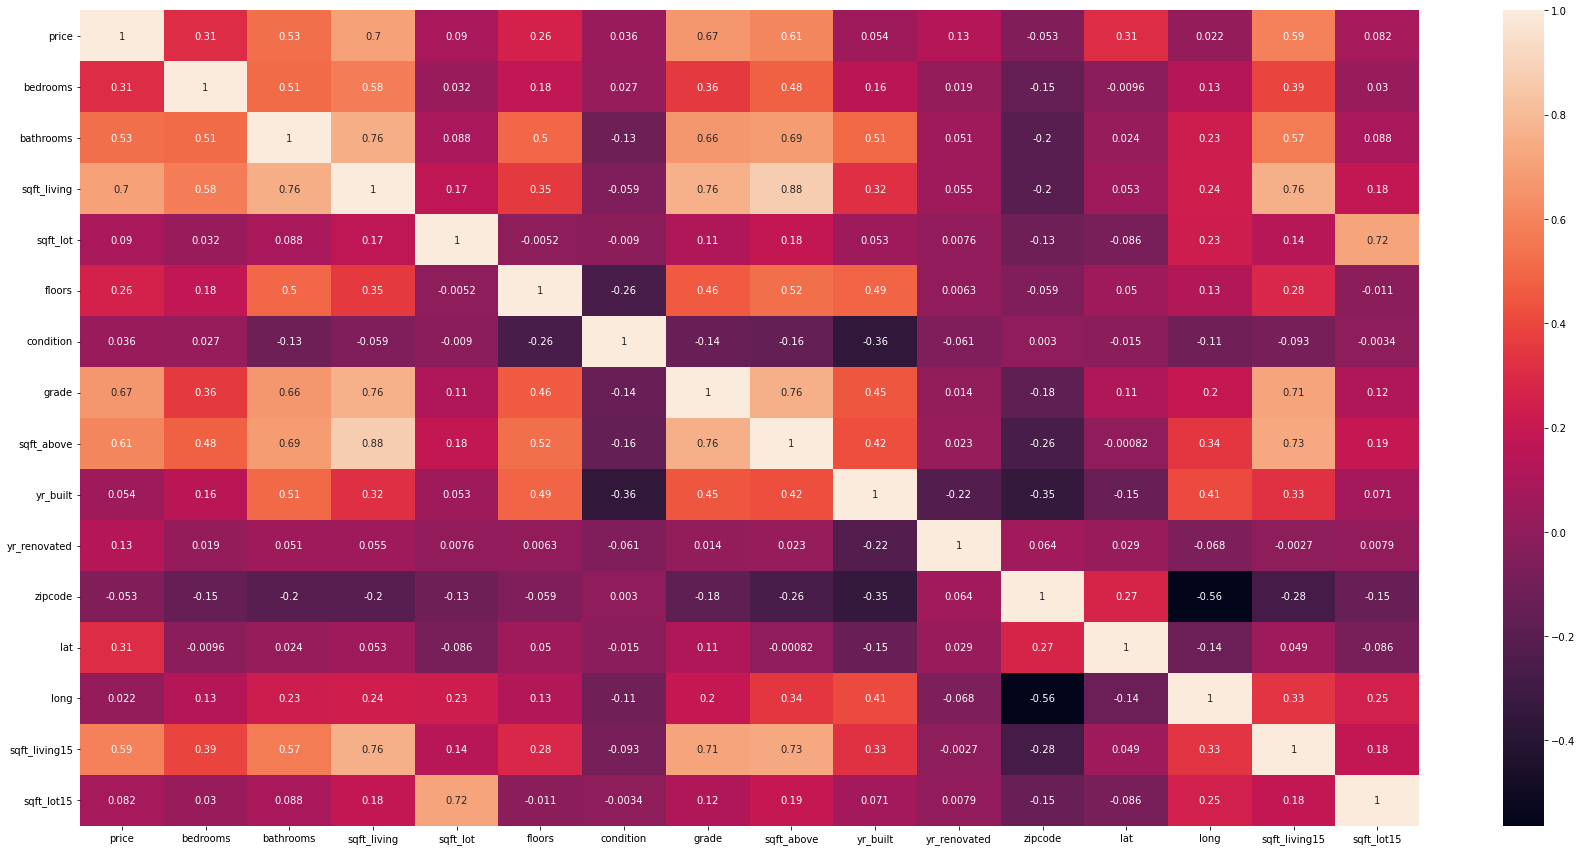

In [67]:
#drop les colonnes qui ont une correlation faible avec la colonne price
plt.figure(figsize=[30,15])
sns.heatmap(data.corr(), annot=True)

In [68]:

cols = []
correlation_data = data.corr()
correlation_values = correlation_data['price'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.2:
        cols.append(correlation_values.index[col])
        data = data.drop([correlation_values.index[col]], axis=1)
data.shape

(21613, 9)

In [69]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,1180,47.5112,1340
1,538000.0,3,2.25,2570,2.0,7,2170,47.7210,1690
2,180000.0,2,1.00,770,1.0,6,770,47.7379,2720
3,604000.0,4,3.00,1960,1.0,7,1050,47.5208,1360
4,510000.0,3,2.00,1680,1.0,8,1680,47.6168,1800


<AxesSubplot:>

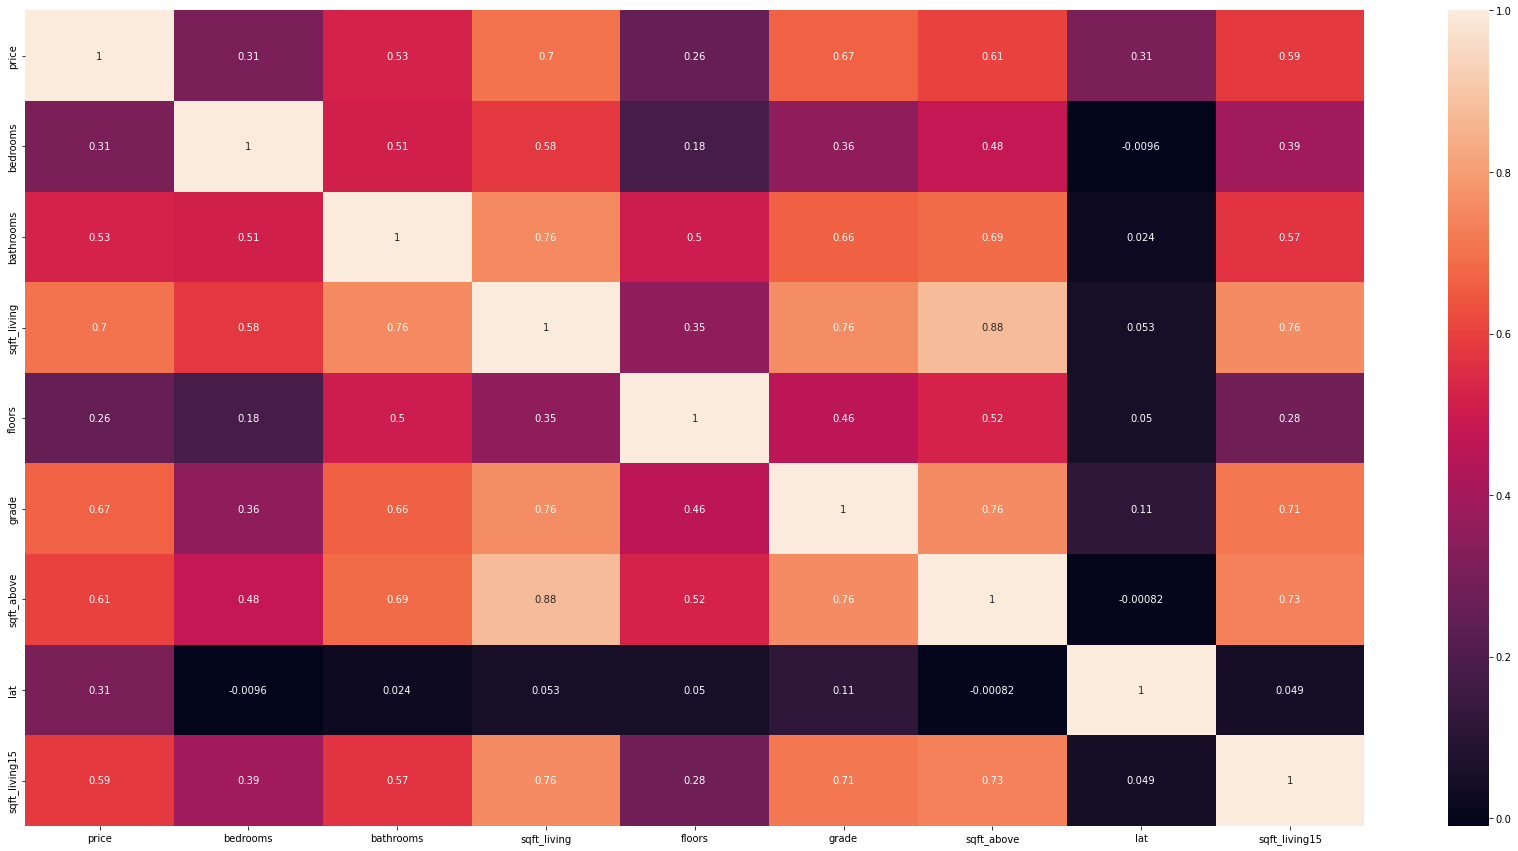

In [70]:
plt.figure(figsize=[30,15])
sns.heatmap(data.corr(), annot=True)

In [71]:
# on va garder pour le model tt les features ont une forte correlation avec le price
#sqft_living
#grade a une forte correaltion avec sqft_living15 et sqft_living on va l'enlever
#sqft_above
#sqft_living15 a une forte correlation avec sqft_living: on va garder sqft_living
#bathrooms
#bedrooms
##########'bedrooms''bathrooms','sqft_living','sqft_lot

In [102]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax"""
    x_vals = np.array(ax.get_xlim())
    y_vals = a * x_vals + b
    ax.plot(x_vals, y_vals, '-')

In [ ]:
plot_line(slope_best, intercept_best, ax)

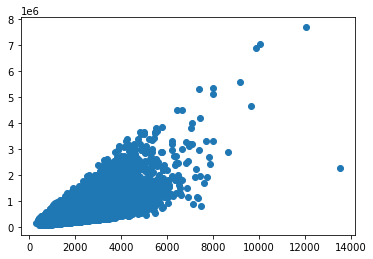

In [98]:
s_x=data["sqft_living"]
s_y=data['price']
plt.scatter(s_x,y=s_y)

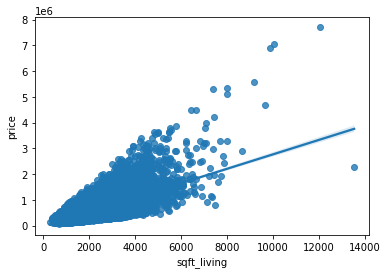

In [104]:
# plot linear model avec regplot 
ax = sns.regplot(y='price', x="sqft_living", data=data)


In [110]:
#pour le  model on va garder que les features suivant 
X=data[["bedrooms","bathrooms","sqft_living","sqft_above"]]
y=data.price

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test =  train_test_split(X, y , test_size = 0.2, random_state= 2022)

In [112]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred=linear_model.predict(X_test_scaler)

In [113]:
linear_model.score(X_test,y_test)

0.503313850075894

In [119]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 469524.1535962487
Mean Squared Error: 360001067611.47266
Root Mean Squared Error: 600000.8896755676
